In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

In [3]:
pip install pyodbc

     |████████████████████████████████| 280 kB 13.3 MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0.32-cp37-cp37m-linux_x86_64.whl size=287391 sha256=f3019333895dd339d83f7b6716df63df2d6297179c55c92d032d12f43788f931
  Stored in directory: /root/.cache/pip/wheels/2e/9c/da/8652fd42e0f662015554f00a9e96fe4f438dfd1ef59787879e
Successfully built pyodbc


In [4]:
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DJO;'
                      'Database=transportSA;'
                      'Trusted_Connection=yes;')

C = pd.read_sql_query('SELECT cast(CODE_STIF_TRNS as numeric) as CODE_STIF_TRNS  , cast(CAT_JOUR as numeric) as CAT_JOUR , TRNC_HORR_60 , pourc_validations From surfaceSA',conn)

Error: ignored

In [ ]:
df=data.copy()
df['TRNC_HORR_60']=df['TRNC_HORR_60'].map({'0H-1H':0,'1H-2H':1,'2H-3H':2,'3H-4H':3,'4H-5H':4,'5H-6H':5,'6H-7H':6,'7H-8H':7,'8H-9H':8,'9H-10H':9,'10H-11H':10,'11H-12H':11,'12H-13H':12,'13H-14H':13,'14H-15H':14,'15H-16H':15,'16H-17H':16,'17H-18H':17,'18H-19H':18,'19H-20H':19,'20H-21H':20,'21H-22H':21,'22H-23H':22,'23H-0H':23})

df.head()

In [ ]:
df.drop('ID_Transporteur',
  axis='columns', inplace=True)
df.head()

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60
0,1,18392,7.35,10.0
1,2,18405,3.12,19.0
2,3,18347,2.61,14.0
3,4,18348,7.64,15.0
4,5,18349,7.30,15.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f210aa7bf10>,
      dtype=object)

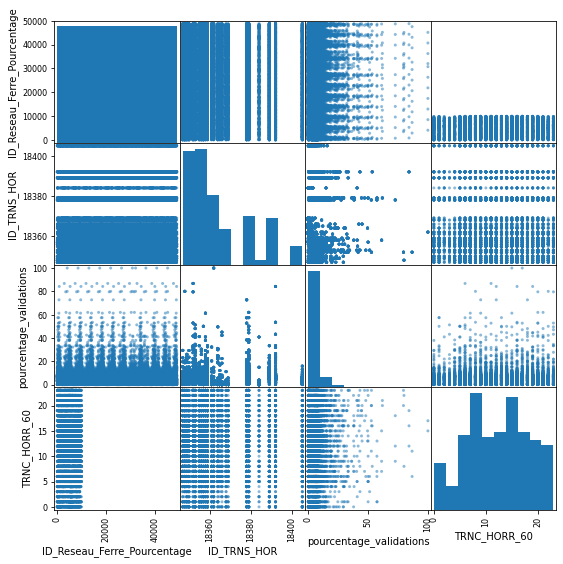

In [ ]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(9,9))

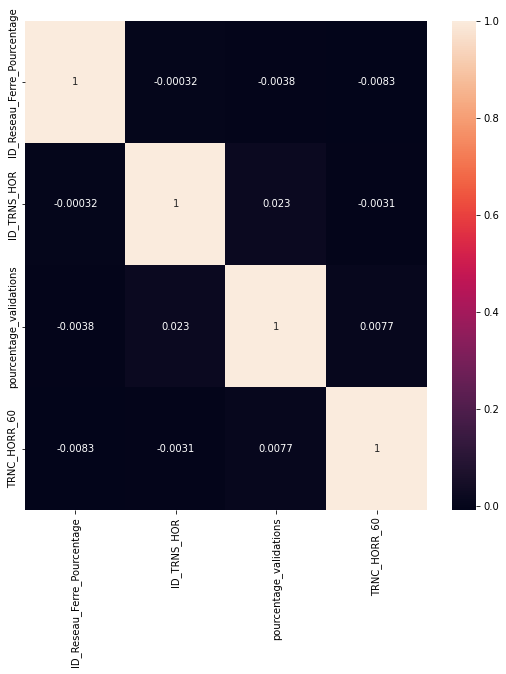

In [ ]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(9,9))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
df.head(2)

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60
0,1,18392,7.35,10.0
1,2,18405,3.12,19.0


In [ ]:
V_SansLabels=df.iloc[:,0:2];
V_Labels=df.iloc[:,2];

In [ ]:
import numpy as np
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=5);
kmeans.fit(V_SansLabels);
idk = np.argsort(kmeans.labels_);
print(pd.DataFrame(V_SansLabels.index[idk],kmeans.labels_[idk]));
kmeans.labels_
print(kmeans.transform(V_SansLabels));
#correspondance avec les groupes réels 
pd.crosstab(V_Labels,kmeans.labels_)

        0
0   12258
0   13261
0   13260
0   13259
0   13258
..    ...
4   35829
4   35828
4   35827
4   35834
4   36684

[48851 rows x 1 columns]
[[14944.0256967  43977.50873244 24679.01544435  5011.57630948
  34299.01113833]
 [14943.05546292 43976.5188467  24678.0334135   5010.66494214
  34298.02407943]
 [14942.00999973 43975.50339744 24677.00612753  5009.53002421
  34297.00439263]
 ...
 [33904.00032761  4870.5022812  24169.00043962 43836.50024727
  14549.00074046]
 [33905.00222629  4871.51549289 24170.00317576 43837.50173794
  14550.00524831]
 [33906.00319235  4872.52221646 24171.00441535 43838.50244989
  14551.00736655]]


col_0,0,1,2,3,4
pourcentage_validations,,,,,
0.00,151,145,164,149,172
0.01,110,108,118,112,124
0.02,56,54,56,56,53
0.03,65,61,63,61,58
0.04,54,53,55,53,49
...,...,...,...,...,...
79.59,2,2,2,2,3
80.00,2,2,2,2,3
84.21,2,3,2,3,1


**CAH**

[0.62671226 0.59014615 0.57187609 0.56077892 0.55378243 0.54847321
 0.54469845 0.54172831 0.53813961]


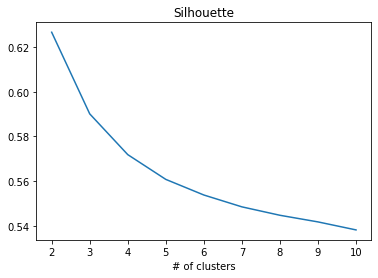

In [ ]:
from sklearn import metrics

#utilisation de la métrique "silhouette" 
#faire varier le nombre de clusters de 2 à 10 
res = np.arange(9,dtype="double") 
for k in np.arange(9): 
  km = cluster.KMeans(n_clusters=k+2) 
  km.fit(V_SansLabels) 
  res[k] = metrics.silhouette_score(V_SansLabels,km.labels_)
print(res)
#graphique 
import matplotlib.pyplot as plt 
plt.title("Silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,11,1),res) 
plt.show()

In [ ]:
df.head()

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60
0,1,18392,7.35,10.0
1,2,18405,3.12,19.0
2,3,18347,2.61,14.0
3,4,18348,7.64,15.0
4,5,18349,7.30,15.0


Text(0, 0.5, 'pourcentage_validations')

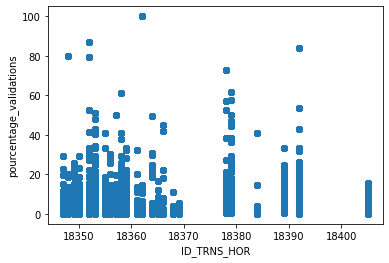

In [ ]:
plt.scatter(df.ID_TRNS_HOR,df['pourcentage_validations'])
plt.xlabel('ID_TRNS_HOR')
plt.ylabel('pourcentage_validations')

In [ ]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['ID_TRNS_HOR','pourcentage_validations']])
y_predicted



array([1, 1, 0, ..., 2, 0, 4], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60,cluster
0,1,18392,7.35,10.0,1
1,2,18405,3.12,19.0,1
2,3,18347,2.61,14.0,0
3,4,18348,7.64,15.0,0
4,5,18349,7.30,15.0,0


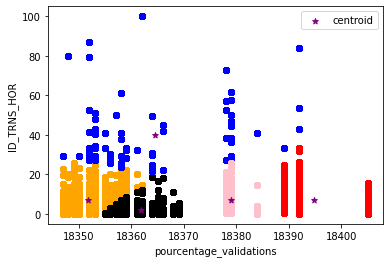

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.ID_TRNS_HOR,df1[' '],color='orange')
plt.scatter(df2. ,df2['pourcentage_validations'],color='red')
plt.scatter(df3.ID_TRNS_HOR,df3['pourcentage_validations'],color='black')
plt.scatter(df4.ID_TRNS_HOR,df4['pourcentage_validations'],color='blue')
plt.scatter(df5.ID_TRNS_HOR,df5['pourcentage_validations'],color='pink')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('pourcentage_validations')
plt.ylabel('ID_TRNS_HOR')
plt.legend()

In [ ]:
df_0=df.groupby(['cluster']).get_group(0)

In [ ]:
df_0.describe()

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60,cluster
count,20438.000000,20438.000000,20438.000000,4155.000000,20438.0
mean,24411.174185,18351.651776,6.937433,12.210108,0.0
std,14130.286649,3.389875,3.350953,5.929971,0.0
min,3.000000,18347.000000,0.010000,0.000000,0.0
25%,12162.250000,18349.000000,5.090000,8.000000,0.0
50%,24336.500000,18352.000000,6.720000,12.000000,0.0
75%,36680.750000,18355.000000,7.990000,17.000000,0.0
max,48850.000000,18364.000000,25.930000,23.000000,0.0


In [ ]:
df_1=df.groupby(['cluster']).get_group(1)
df_1.describe()

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60,cluster
count,7062.000000,7062.000000,7062.000000,1434.000000,7062.0
mean,24411.084820,18394.786604,6.914174,12.216179,1.0
std,14079.332914,6.740852,4.369571,5.995287,0.0
min,1.000000,18389.000000,0.020000,0.000000,1.0
25%,12244.500000,18389.000000,4.340000,7.000000,1.0
50%,24391.000000,18392.000000,6.070000,12.000000,1.0
75%,36602.000000,18405.000000,8.520000,17.000000,1.0
max,48843.000000,18405.000000,33.330000,23.000000,1.0


In [ ]:
df_2=df.groupby(['cluster']).get_group(2)
df_2.describe()

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60,cluster
count,14927.000000,14927.000000,14927.000000,2988.000000,14927.0
mean,24474.159778,18361.786293,1.810516,12.336345,2.0
std,14039.351142,3.999031,2.099095,6.034356,0.0
min,18.000000,18355.000000,0.000000,0.000000,2.0
25%,12310.000000,18358.000000,0.300000,8.000000,2.0
50%,24563.000000,18361.000000,1.080000,13.000000,2.0
75%,36537.000000,18365.000000,2.580000,17.000000,2.0
max,48849.000000,18369.000000,18.630000,23.000000,2.0


In [ ]:
df_3=df.groupby(['cluster']).get_group(3)
df_3.describe()

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60,cluster
count,858.000000,858.000000,858.000000,205.000000,858.0
mean,24078.907925,18364.474359,40.020513,12.424390,3.0
std,14745.429393,12.382467,16.139439,6.339295,0.0
min,106.000000,18347.000000,21.880000,0.000000,3.0
25%,11013.500000,18353.000000,29.200000,7.000000,3.0
50%,22870.500000,18360.000000,33.330000,13.000000,3.0
75%,36826.500000,18379.000000,47.040000,18.000000,3.0
max,48839.000000,18392.000000,100.000000,23.000000,3.0


In [ ]:
df_4=df.groupby(['cluster']).get_group(4)
df_4.describe()

,ID_Reseau_Ferre_Pourcentage,ID_TRNS_HOR,pourcentage_validations,TRNC_HORR_60,cluster
count,5566.000000,5566.000000,5566.000000,1126.000000,5566.0
mean,24423.712001,18379.065217,6.955791,12.132327,4.0
std,14099.086446,1.753104,4.698867,6.167246,0.0
min,9.000000,18378.000000,0.000000,0.000000,4.0
25%,12171.750000,18378.000000,3.130000,7.000000,4.0
50%,24461.500000,18379.000000,7.185000,12.000000,4.0
75%,36698.750000,18379.000000,9.030000,17.000000,4.0
max,48851.000000,18384.000000,25.710000,23.000000,4.0


In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)


In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]